In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#custom
from quantum_layer import QuantumLayer

In [2]:
import numpy as np
import os

# Define the folder path (Update this if your LDA files are in a different spot)
# Assuming you might have a separate 'lda' folder or saved them in 'features/training-a'
features_folder_lda = "./../../features/training-a/lda" 

print(f"📂 Loading processed LDA features from: {features_folder_lda}\n")

# ==========================================
# 3. Load Grayscale LDA Data (Train & Test)
# ==========================================
print("--- Loading Grayscale LDA Data ---")
try:
    # Load Labels (Reusing the same labels logic, assuming they are saved here too)
    # If you didn't save separate labels for LDA, you can use the UMAP ones 
    # as the split random_state was the same.
    y_train_gray = np.load(os.path.join(features_folder_lda, "y_train_gray.npy"))
    y_test_gray  = np.load(os.path.join(features_folder_lda, "y_test_gray.npy"))

    # Load 4-Dimension Features
    X_train_gray_lda_4 = np.load(os.path.join(features_folder_lda, "X_train_gray_lda_4.npy"))
    X_test_gray_lda_4  = np.load(os.path.join(features_folder_lda, "X_test_gray_lda_4.npy"))

    # Load 8-Dimension Features
    X_train_gray_lda_8 = np.load(os.path.join(features_folder_lda, "X_train_gray_lda_8.npy"))
    X_test_gray_lda_8  = np.load(os.path.join(features_folder_lda, "X_test_gray_lda_8.npy"))

    print("✅ Grayscale LDA Loaded Successfully")
    print(f"   > Train Labels: {y_train_gray.shape} | Test Labels: {y_test_gray.shape}")
    print(f"   > Train (4D):   {X_train_gray_lda_4.shape} | Test (4D): {X_test_gray_lda_4.shape}")
    print(f"   > Train (8D):   {X_train_gray_lda_8.shape} | Test (8D): {X_test_gray_lda_8.shape}")

except FileNotFoundError as e:
    print(f"❌ Error loading Grayscale LDA data: {e}")


# ==========================================
# 4. Load Binary LDA Data (Train & Test)
# ==========================================
print("\n--- Loading Binary LDA Data ---")
try:
    # Load Labels
    y_train_binary = np.load(os.path.join(features_folder_lda, "y_train_binary.npy"))
    y_test_binary  = np.load(os.path.join(features_folder_lda, "y_test_binary.npy"))

    # Load 4-Dimension Features
    X_train_binary_lda_4 = np.load(os.path.join(features_folder_lda, "X_train_binary_lda_4.npy"))
    X_test_binary_lda_4  = np.load(os.path.join(features_folder_lda, "X_test_binary_lda_4.npy"))

    # Load 8-Dimension Features
    X_train_binary_lda_8 = np.load(os.path.join(features_folder_lda, "X_train_binary_lda_8.npy"))
    X_test_binary_lda_8  = np.load(os.path.join(features_folder_lda, "X_test_binary_lda_8.npy"))

    print("✅ Binary LDA Loaded Successfully")
    print(f"   > Train Labels: {y_train_binary.shape} | Test Labels: {y_test_binary.shape}")
    print(f"   > Train (4D):   {X_train_binary_lda_4.shape} | Test (4D): {X_test_binary_lda_4.shape}")
    print(f"   > Train (8D):   {X_train_binary_lda_8.shape} | Test (8D): {X_test_binary_lda_8.shape}")

except FileNotFoundError as e:
    print(f"❌ Error loading Binary LDA data: {e}")

print("\nReady for LDA model training.")

📂 Loading processed LDA features from: ./../../features/training-a/lda

--- Loading Grayscale LDA Data ---
✅ Grayscale LDA Loaded Successfully
   > Train Labels: (15761,) | Test Labels: (3941,)
   > Train (4D):   (15761, 4) | Test (4D): (3941, 4)
   > Train (8D):   (15761, 8) | Test (8D): (3941, 8)

--- Loading Binary LDA Data ---
✅ Binary LDA Loaded Successfully
   > Train Labels: (15761,) | Test Labels: (3941,)
   > Train (4D):   (15761, 4) | Test (4D): (3941, 4)
   > Train (8D):   (15761, 8) | Test (8D): (3941, 8)

Ready for LDA model training.


In [3]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler

print("Scaling LDA data and converting to PyTorch tensors...\n")

# ==========================================
# 0. Pre-processing: Scale the LDA Data
# ==========================================
# We need to scale the features before converting to tensors, 
# just like you did for the UMAP data.

scaler_g4 = StandardScaler()
X_train_gray_lda_4_scaled = scaler_g4.fit_transform(X_train_gray_lda_4)
X_test_gray_lda_4_scaled  = scaler_g4.transform(X_test_gray_lda_4)

scaler_g8 = StandardScaler()
X_train_gray_lda_8_scaled = scaler_g8.fit_transform(X_train_gray_lda_8)
X_test_gray_lda_8_scaled  = scaler_g8.transform(X_test_gray_lda_8)

scaler_b4 = StandardScaler()
X_train_binary_lda_4_scaled = scaler_b4.fit_transform(X_train_binary_lda_4)
X_test_binary_lda_4_scaled  = scaler_b4.transform(X_test_binary_lda_4)

scaler_b8 = StandardScaler()
X_train_binary_lda_8_scaled = scaler_b8.fit_transform(X_train_binary_lda_8)
X_test_binary_lda_8_scaled  = scaler_b8.transform(X_test_binary_lda_8)


# ==========================================
# 1. Grayscale LDA Data (4D & 8D)
# ==========================================
# --- Gray 4D LDA ---
X_train_g4_lda_t = torch.tensor(X_train_gray_lda_4_scaled, dtype=torch.float32)
y_train_g4_lda_t = torch.tensor(y_train_gray, dtype=torch.long)
X_test_g4_lda_t  = torch.tensor(X_test_gray_lda_4_scaled, dtype=torch.float32)
y_test_g4_lda_np = y_test_gray  # Keep as numpy for evaluation

# --- Gray 8D LDA ---
X_train_g8_lda_t = torch.tensor(X_train_gray_lda_8_scaled, dtype=torch.float32)
y_train_g8_lda_t = torch.tensor(y_train_gray, dtype=torch.long)
X_test_g8_lda_t  = torch.tensor(X_test_gray_lda_8_scaled, dtype=torch.float32)
y_test_g8_lda_np = y_test_gray


# ==========================================
# 2. Binary LDA Data (4D & 8D)
# ==========================================
# --- Binary 4D LDA ---
X_train_b4_lda_t = torch.tensor(X_train_binary_lda_4_scaled, dtype=torch.float32)
y_train_b4_lda_t = torch.tensor(y_train_binary, dtype=torch.long)
X_test_b4_lda_t  = torch.tensor(X_test_binary_lda_4_scaled, dtype=torch.float32)
y_test_b4_lda_np = y_test_binary

# --- Binary 8D LDA ---
X_train_b8_lda_t = torch.tensor(X_train_binary_lda_8_scaled, dtype=torch.float32)
y_train_b8_lda_t = torch.tensor(y_train_binary, dtype=torch.long)
X_test_b8_lda_t  = torch.tensor(X_test_binary_lda_8_scaled, dtype=torch.float32)
y_test_b8_lda_np = y_test_binary


# ==========================================
# 3. Validation
# ==========================================
print(f"✅ Gray LDA 4D Tensor:   {X_train_g4_lda_t.shape}, dtype={X_train_g4_lda_t.dtype}")
print(f"✅ Gray LDA 8D Tensor:   {X_train_g8_lda_t.shape}, dtype={X_train_g8_lda_t.dtype}")
print(f"✅ Binary LDA 4D Tensor: {X_train_b4_lda_t.shape}, dtype={X_train_b4_lda_t.dtype}")
print(f"✅ Binary LDA 8D Tensor: {X_train_b8_lda_t.shape}, dtype={X_train_b8_lda_t.dtype}")

print("\nReady for Neural Network training (LDA).")

Scaling LDA data and converting to PyTorch tensors...

✅ Gray LDA 4D Tensor:   torch.Size([15761, 4]), dtype=torch.float32
✅ Gray LDA 8D Tensor:   torch.Size([15761, 8]), dtype=torch.float32
✅ Binary LDA 4D Tensor: torch.Size([15761, 4]), dtype=torch.float32
✅ Binary LDA 8D Tensor: torch.Size([15761, 8]), dtype=torch.float32

Ready for Neural Network training (LDA).


In [4]:
import torch
import torch.nn as nn
from quantum_layer import QuantumLayer  # Ensure quantum_layer.py is available

# ==========================================
# 0. Configuration
# ==========================================
NUM_CLASSES = 10   
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

print(f"🚀 Initializing LDA Hybrid Models on device: {device}")

# ==========================================
# 1. Initialize LDA Model Dictionaries
# ==========================================
models_gray_lda = {}
models_binary_lda = {}

# We are building models for 4 and 8 dimensions (matching your LDA data)
components_list = [4, 8] 

print("\n--- Building Hybrid Architectures (LDA) ---")

for n in components_list:
    # -------------------- Grayscale LDA Models --------------------
    # Architecture: Quantum Layer (n) -> Linear (16) -> ReLU -> Linear (10)
    models_gray_lda[n] = nn.Sequential(
        QuantumLayer(n_qubits=n), 
        nn.Linear(n, 16),         
        nn.ReLU(),
        nn.Linear(16, NUM_CLASSES)        
    ).to(device) # Move to GPU/CPU

    # -------------------- Binary LDA Models --------------------
    models_binary_lda[n] = nn.Sequential(
        QuantumLayer(n_qubits=n), 
        nn.Linear(n, 16),         
        nn.ReLU(),
        nn.Linear(16, NUM_CLASSES)        
    ).to(device)

    print(f"✅ Created Gray & Binary LDA models for n={n} inputs")

# ==========================================
# 2. Verify Structure
# ==========================================
print(f"\n[Example Inspection] Gray LDA Model (n=4):\n{models_gray_lda[4]}")
print(f"\n[Example Inspection] Binary LDA Model (n=8):\n{models_binary_lda[8]}")

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


🚀 Initializing LDA Hybrid Models on device: cpu

--- Building Hybrid Architectures (LDA) ---


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


✅ Created Gray & Binary LDA models for n=4 inputs
✅ Created Gray & Binary LDA models for n=8 inputs

[Example Inspection] Gray LDA Model (n=4):
Sequential(
  (0): QuantumLayer(
    (q_layer): TorchConnector()
  )
  (1): Linear(in_features=4, out_features=16, bias=True)
  (2): ReLU()
  (3): Linear(in_features=16, out_features=10, bias=True)
)

[Example Inspection] Binary LDA Model (n=8):
Sequential(
  (0): QuantumLayer(
    (q_layer): TorchConnector()
  )
  (1): Linear(in_features=8, out_features=16, bias=True)
  (2): ReLU()
  (3): Linear(in_features=16, out_features=10, bias=True)
)


In [5]:
# ==========================================
# Organize LDA Tensors into Dictionaries
# ==========================================

# --- Grayscale LDA Dictionaries ---
X_train_gray_lda_t_dict = {
    4: X_train_g4_lda_t, 
    8: X_train_g8_lda_t
}

y_train_gray_lda_t_dict = {
    4: y_train_g4_lda_t, 
    8: y_train_g8_lda_t
}

X_test_gray_lda_t_dict = {
    4: X_test_g4_lda_t,  
    8: X_test_g8_lda_t
}

y_test_gray_lda_np_dict = {
    4: y_test_g4_lda_np, 
    8: y_test_g8_lda_np
}

# --- Binary LDA Dictionaries ---
X_train_binary_lda_t_dict = {
    4: X_train_b4_lda_t, 
    8: X_train_b8_lda_t
}

y_train_binary_lda_t_dict = {
    4: y_train_b4_lda_t, 
    8: y_train_b8_lda_t
}

X_test_binary_lda_t_dict = {
    4: X_test_b4_lda_t,  
    8: X_test_b8_lda_t
}

y_test_binary_lda_np_dict = {
    4: y_test_b4_lda_np, 
    8: y_test_b8_lda_np
}

print("✅ LDA Data successfully organized into dictionaries.")
print(f"   > Gray LDA Train keys:   {list(X_train_gray_lda_t_dict.keys())}")
print(f"   > Binary LDA Train keys: {list(X_train_binary_lda_t_dict.keys())}")

✅ LDA Data successfully organized into dictionaries.
   > Gray LDA Train keys:   [4, 8]
   > Binary LDA Train keys: [4, 8]


In [6]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm

# ==========================================
# 1. Reusable Training Function
# ==========================================
def train_and_evaluate(model, X_train, y_train, X_test, y_test_np, model_name, device, epochs=10, batch_size=32, lr=0.01):
    print(f"\n{'='*20} Training {model_name} {'='*20}")
    
    # Checkpoint path
    checkpoint_path = f"checkpoint_{model_name}.pth"
    
    # Initialize lists & Optimizer
    train_losses, val_losses, test_losses = [], [], []
    train_accs, val_accs, test_accs = [], [], []
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # --- Validation Split (10%) ---
    num_samples = X_train.shape[0]
    val_size = int(0.1 * num_samples)
    
    # Move validation data to device immediately for speed
    X_val = X_train[:val_size].to(device)
    y_val = y_train[:val_size].to(device)
    
    # Keep Training data on CPU initially (moved to GPU in batches) or move all if VRAM allows
    X_train_split = X_train[val_size:]
    y_train_split = y_train[val_size:]
    
    # Move Test data to device
    X_test_dev = X_test.to(device)
    y_test_tensor = torch.tensor(y_test_np, dtype=torch.long).to(device)

    num_train_samples = X_train_split.shape[0]

    # --- Resume Logic ---
    start_epoch = 1
    if os.path.exists(checkpoint_path):
        print(f"🔄 Found checkpoint for {model_name}, loading...")
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint["model_state"])
        optimizer.load_state_dict(checkpoint["optimizer_state"])
        train_losses = checkpoint["train_losses"]
        val_losses   = checkpoint["val_losses"]
        test_losses  = checkpoint["test_losses"]
        train_accs   = checkpoint["train_accs"]
        val_accs     = checkpoint["val_accs"]
        test_accs    = checkpoint["test_accs"]
        start_epoch  = checkpoint["epoch"] + 1
        print(f"   > Resuming from epoch {start_epoch}")
    
    # -------------------- Training Loop --------------------
    for ep in range(start_epoch, epochs + 1):
        model.train()
        epoch_loss = 0

        # Shuffle indices for this epoch
        permutation = torch.randperm(num_train_samples)
        
        # Batch Loop
        for i in tqdm(range(0, num_train_samples, batch_size), desc=f"{model_name} Epoch {ep}/{epochs}", leave=False):
            indices = permutation[i:i + batch_size]
            X_batch = X_train_split[indices].to(device)
            y_batch = y_train_split[indices].to(device)

            optimizer.zero_grad()
            logits = model(X_batch)
            loss = loss_fn(logits, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Avg Loss for this epoch
        avg_train_loss = epoch_loss / (num_train_samples / batch_size)
        train_losses.append(avg_train_loss)

        # -------------------- Evaluation Step --------------------
        model.eval()
        with torch.no_grad():
            # 1. Train Accuracy (using a subset to save time if huge)
            train_subset_idx = torch.randperm(num_train_samples)[:1000] # Random 1000 samples
            X_tr_sub = X_train_split[train_subset_idx].to(device)
            y_tr_sub = y_train_split[train_subset_idx].to(device)
            
            train_preds = model(X_tr_sub).argmax(dim=1).cpu().numpy()
            train_acc = accuracy_score(y_tr_sub.cpu().numpy(), train_preds)
            
            # 2. Validation Metrics
            val_logits = model(X_val)
            val_loss = loss_fn(val_logits, y_val).item()
            val_preds = val_logits.argmax(dim=1).cpu().numpy()
            val_acc = accuracy_score(y_val.cpu().numpy(), val_preds)
            
            # 3. Test Metrics
            test_logits = model(X_test_dev)
            test_loss = loss_fn(test_logits, y_test_tensor).item()
            test_preds = test_logits.argmax(dim=1).cpu().numpy()
            test_acc = accuracy_score(y_test_np, test_preds)

        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        print(f"Epoch {ep} | Train Loss: {avg_train_loss:.4f} | Val Acc: {val_acc*100:.2f}% | Test Acc: {test_acc*100:.2f}%")

        # Save Checkpoint
        torch.save({
            "epoch": ep,
            "model_state": model.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "train_losses": train_losses, "val_losses": val_losses, "test_losses": test_losses,
            "train_accs": train_accs, "val_accs": val_accs, "test_accs": test_accs
        }, checkpoint_path)

    # ==========================================
    # Final Visualization
    # ==========================================
    print("\nRunning final evaluation for visualization...")
    model.eval()
    with torch.no_grad():
        final_logits = model(X_test_dev)
        final_preds = final_logits.argmax(dim=1).cpu().numpy()

    # --- Plot Loss ---
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.plot(test_losses, label='Test')
    plt.title(f"{model_name} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # --- Plot Accuracy ---
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train')
    plt.plot(val_accs, label='Validation')
    plt.plot(test_accs, label='Test')
    plt.title(f"{model_name} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test_np, final_preds)
    disp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(8, 8))
    disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    print(f"✅ {model_name} training complete.\n")

🚀 Starting LDA Model Training (Epochs=10, Batch=32, LR=0.01)...

--- Preparing Gray_LDA_4D ---

==================== Training Gray_LDA_4D ====================


Epoch 1 | Train Loss: 2.1538 | Val Acc: 22.78% | Test Acc: 25.48%


Epoch 2 | Train Loss: 2.0796 | Val Acc: 24.49% | Test Acc: 25.43%


Epoch 3 | Train Loss: 2.0728 | Val Acc: 22.65% | Test Acc: 24.59%


Epoch 4 | Train Loss: 2.0712 | Val Acc: 23.16% | Test Acc: 25.63%


Epoch 5 | Train Loss: 2.0682 | Val Acc: 23.73% | Test Acc: 24.87%


Epoch 6 | Train Loss: 2.0671 | Val Acc: 23.29% | Test Acc: 25.30%


Epoch 7 | Train Loss: 2.0657 | Val Acc: 23.54% | Test Acc: 25.10%


Epoch 8 | Train Loss: 2.0650 | Val Acc: 22.97% | Test Acc: 25.25%


Epoch 9 | Train Loss: 2.0632 | Val Acc: 24.68% | Test Acc: 25.45%


Epoch 10 | Train Loss: 2.0628 | Val Acc: 24.75% | Test Acc: 25.83%

Running final evaluation for visualization...


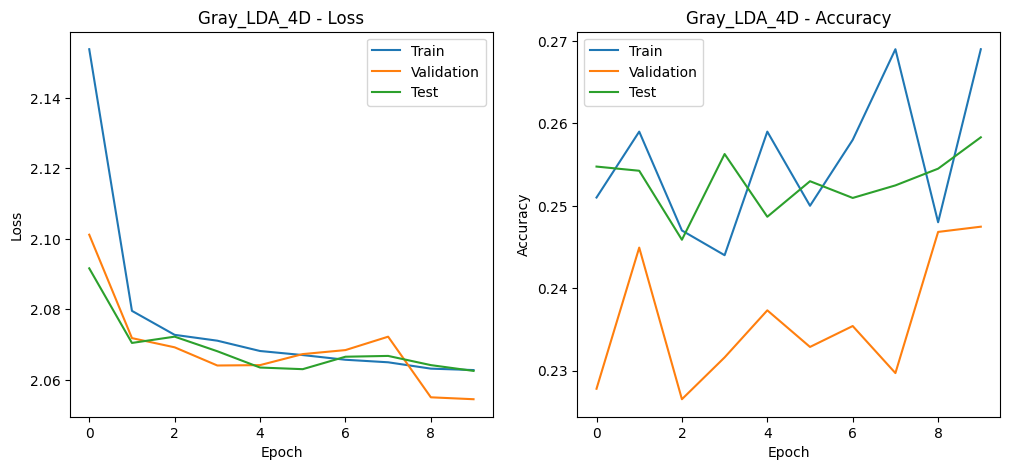

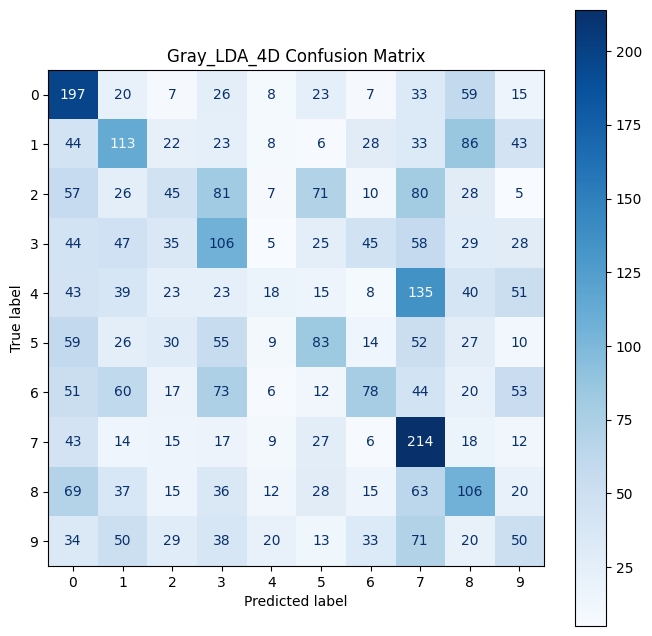

✅ Gray_LDA_4D training complete.

--- Preparing Gray_LDA_8D ---

==================== Training Gray_LDA_8D ====================


Epoch 1 | Train Loss: 2.2049 | Val Acc: 21.26% | Test Acc: 22.33%


Epoch 2 | Train Loss: 2.1259 | Val Acc: 24.18% | Test Acc: 23.62%


Epoch 3 | Train Loss: 2.1067 | Val Acc: 24.30% | Test Acc: 24.77%


Epoch 4 | Train Loss: 2.1010 | Val Acc: 24.24% | Test Acc: 25.70%


Gray_LDA_8D Epoch 5/10:  80%|████████  | 356/444 [1:24:32<16:43, 11.40s/it]

In [ ]:
# ==========================================
# 2. Execute Training for LDA Models
# ==========================================

# Define lists to iterate over
dims = [4, 8]
EPOCHS = 10
BATCH_SIZE = 32
LR = 0.01

print(f"🚀 Starting LDA Model Training (Epochs={EPOCHS}, Batch={BATCH_SIZE}, LR={LR})...\n")

# ---------------------------------------------------------
# A. Train Grayscale LDA Models (4D & 8D)
# ---------------------------------------------------------
for n in dims:
    model_name = f"Gray_LDA_{n}D"
    print(f"--- Preparing {model_name} ---")
    
    # Retrieve specific data and model from dictionaries
    model     = models_gray_lda[n]
    X_train   = X_train_gray_lda_t_dict[n]
    y_train   = y_train_gray_lda_t_dict[n]
    X_test    = X_test_gray_lda_t_dict[n]
    y_test_np = y_test_gray_lda_np_dict[n]

    # Run Training
    train_and_evaluate(
        model=model,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test_np=y_test_np,
        model_name=model_name,
        device=device,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        lr=LR
    )

# ---------------------------------------------------------
# B. Train Binary LDA Models (4D & 8D)
# ---------------------------------------------------------
for n in dims:
    model_name = f"Binary_LDA_{n}D"
    print(f"--- Preparing {model_name} ---")
    
    # Retrieve specific data and model from dictionaries
    model     = models_binary_lda[n]
    X_train   = X_train_binary_lda_t_dict[n]
    y_train   = y_train_binary_lda_t_dict[n]
    X_test    = X_test_binary_lda_t_dict[n]
    y_test_np = y_test_binary_lda_np_dict[n]

    # Run Training
    train_and_evaluate(
        model=model,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test_np=y_test_np,
        model_name=model_name,
        device=device,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        lr=LR
    )

print("\n🎉 All LDA models trained and evaluated successfully!")

🚀 Starting LDA Model Training (Epochs=10, Batch=32, LR=0.01)...

--- Preparing Gray_LDA_4D ---

==================== Training Gray_LDA_4D ====================
🔄 Found checkpoint for Gray_LDA_4D, loading...
   > Resuming from epoch 11

Running final evaluation for visualization...


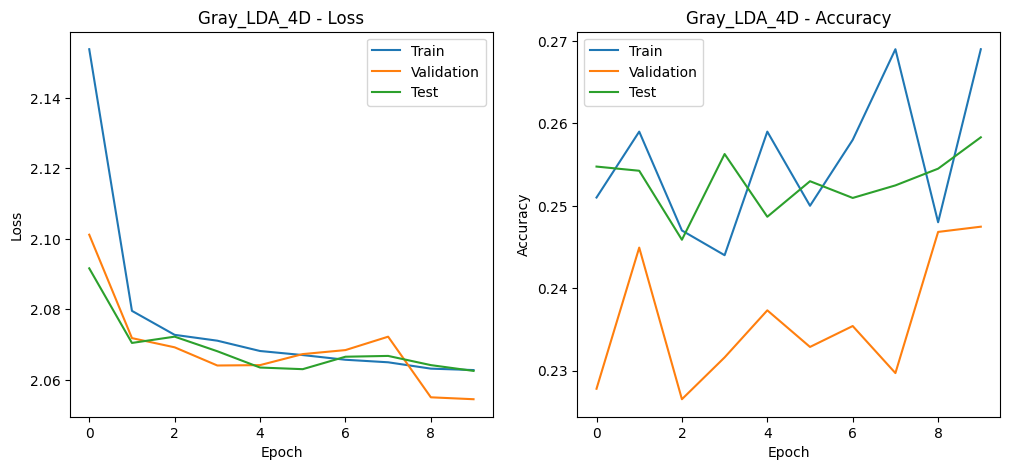

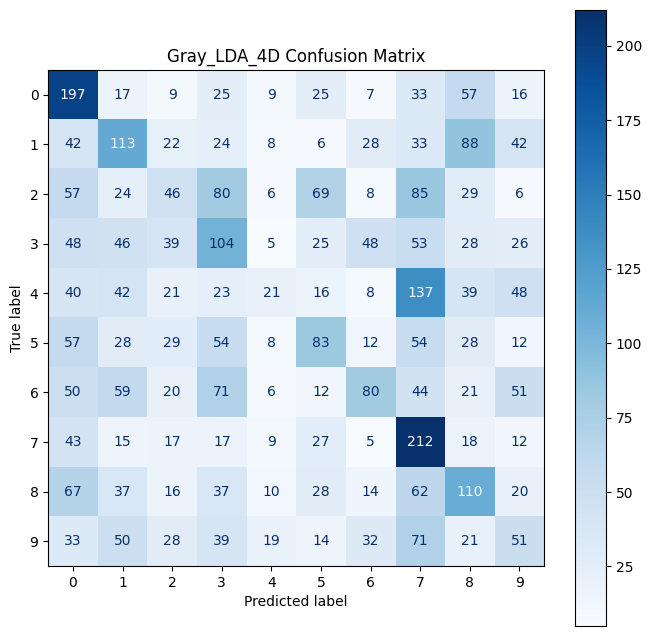

✅ Gray_LDA_4D training complete.

--- Preparing Gray_LDA_8D ---

==================== Training Gray_LDA_8D ====================
🔄 Found checkpoint for Gray_LDA_8D, loading...
   > Resuming from epoch 5


Epoch 5 | Train Loss: 2.0965 | Val Acc: 25.06% | Test Acc: 25.75%


Epoch 6 | Train Loss: 2.0890 | Val Acc: 25.82% | Test Acc: 25.91%


Epoch 7 | Train Loss: 2.0858 | Val Acc: 25.63% | Test Acc: 25.91%


Epoch 8 | Train Loss: 2.0831 | Val Acc: 26.08% | Test Acc: 26.14%


Epoch 9 | Train Loss: 2.0815 | Val Acc: 25.38% | Test Acc: 26.57%


Epoch 10 | Train Loss: 2.0784 | Val Acc: 25.19% | Test Acc: 25.98%

Running final evaluation for visualization...


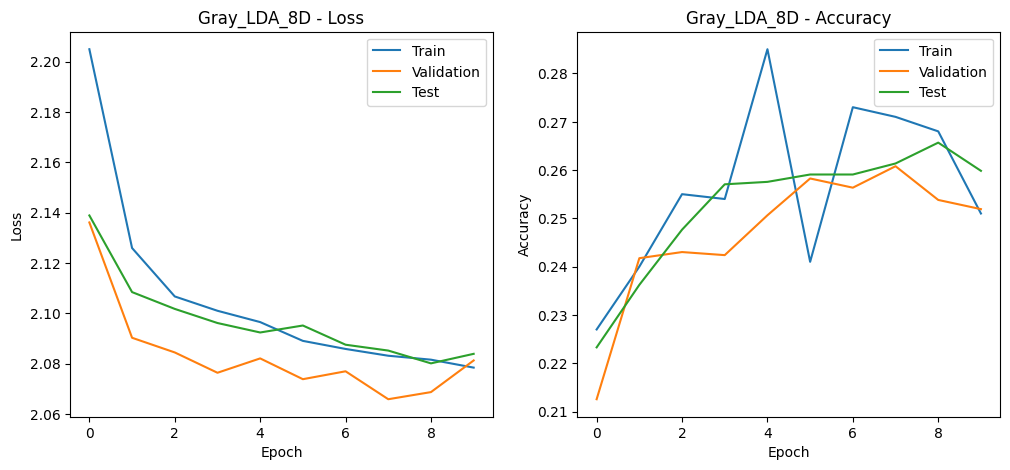

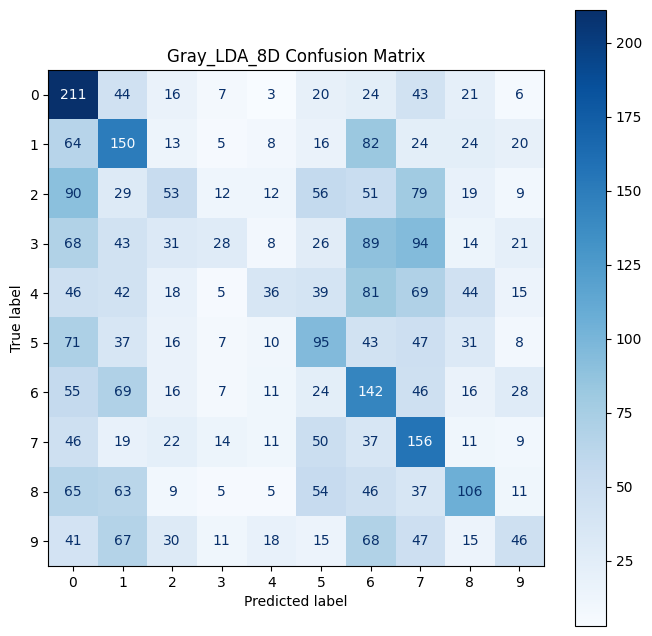

✅ Gray_LDA_8D training complete.

--- Preparing Binary_LDA_4D ---

==================== Training Binary_LDA_4D ====================


Epoch 1 | Train Loss: 2.2323 | Val Acc: 18.65% | Test Acc: 17.96%


Epoch 2 | Train Loss: 2.2001 | Val Acc: 19.16% | Test Acc: 18.75%


Epoch 3 | Train Loss: 2.1915 | Val Acc: 19.86% | Test Acc: 18.93%


Epoch 4 | Train Loss: 2.1899 | Val Acc: 20.37% | Test Acc: 19.28%


Epoch 5 | Train Loss: 2.1888 | Val Acc: 19.48% | Test Acc: 19.01%


Epoch 6 | Train Loss: 2.1883 | Val Acc: 20.11% | Test Acc: 19.99%


Epoch 7 | Train Loss: 2.1863 | Val Acc: 19.48% | Test Acc: 19.64%


Epoch 8 | Train Loss: 2.1872 | Val Acc: 20.75% | Test Acc: 19.97%


Epoch 9 | Train Loss: 2.1864 | Val Acc: 19.48% | Test Acc: 18.60%


Epoch 10 | Train Loss: 2.1866 | Val Acc: 19.54% | Test Acc: 19.46%

Running final evaluation for visualization...


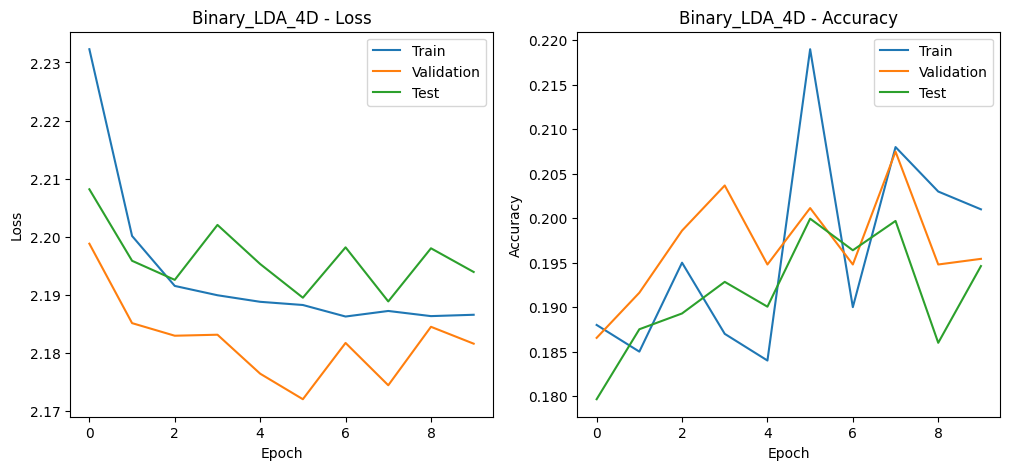

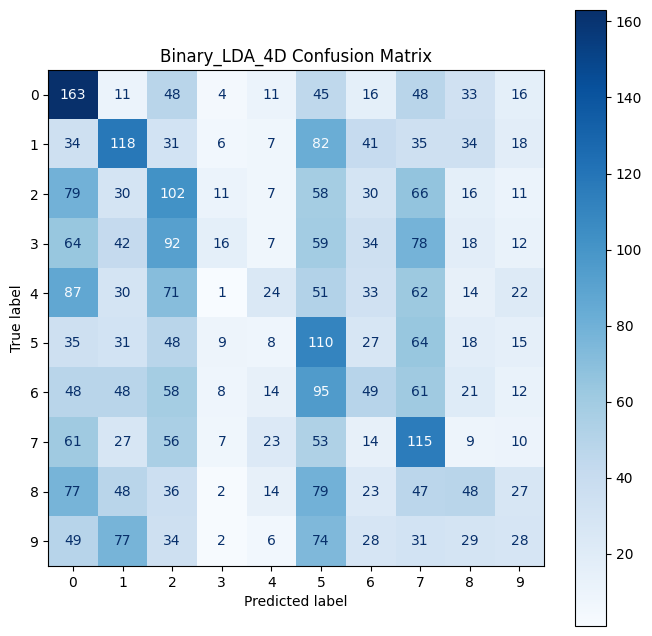

✅ Binary_LDA_4D training complete.

--- Preparing Binary_LDA_8D ---

==================== Training Binary_LDA_8D ====================


Epoch 1 | Train Loss: 2.2439 | Val Acc: 17.51% | Test Acc: 16.87%


Epoch 2 | Train Loss: 2.2165 | Val Acc: 16.24% | Test Acc: 16.59%


Epoch 3 | Train Loss: 2.2093 | Val Acc: 17.51% | Test Acc: 17.31%


Epoch 4 | Train Loss: 2.2053 | Val Acc: 18.85% | Test Acc: 17.18%


Epoch 5 | Train Loss: 2.2043 | Val Acc: 18.02% | Test Acc: 18.22%


Epoch 6 | Train Loss: 2.2000 | Val Acc: 17.58% | Test Acc: 16.72%


Binary_LDA_8D Epoch 7/10:  95%|█████████▌| 423/444 [1:00:53<03:00,  8.60s/it]

In [ ]:
# ==========================================
# 2. Execute Training for LDA Models
# ==========================================

# Define lists to iterate over
dims = [4, 8]
EPOCHS = 10
BATCH_SIZE = 32
LR = 0.01

print(f"🚀 Starting LDA Model Training (Epochs={EPOCHS}, Batch={BATCH_SIZE}, LR={LR})...\n")

# ---------------------------------------------------------
# A. Train Grayscale LDA Models (4D & 8D)
# ---------------------------------------------------------
for n in dims:
    model_name = f"Gray_LDA_{n}D"
    print(f"--- Preparing {model_name} ---")
    
    # Retrieve specific data and model from dictionaries
    model     = models_gray_lda[n]
    X_train   = X_train_gray_lda_t_dict[n]
    y_train   = y_train_gray_lda_t_dict[n]
    X_test    = X_test_gray_lda_t_dict[n]
    y_test_np = y_test_gray_lda_np_dict[n]

    # Run Training
    train_and_evaluate(
        model=model,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test_np=y_test_np,
        model_name=model_name,
        device=device,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        lr=LR
    )

# ---------------------------------------------------------
# B. Train Binary LDA Models (4D & 8D)
# ---------------------------------------------------------
for n in dims:
    model_name = f"Binary_LDA_{n}D"
    print(f"--- Preparing {model_name} ---")
    
    # Retrieve specific data and model from dictionaries
    model     = models_binary_lda[n]
    X_train   = X_train_binary_lda_t_dict[n]
    y_train   = y_train_binary_lda_t_dict[n]
    X_test    = X_test_binary_lda_t_dict[n]
    y_test_np = y_test_binary_lda_np_dict[n]

    # Run Training
    train_and_evaluate(
        model=model,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test_np=y_test_np,
        model_name=model_name,
        device=device,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        lr=LR
    )

print("\n🎉 All LDA models trained and evaluated successfully!")

🚀 Starting LDA Model Training (Epochs=10, Batch=32, LR=0.01)...

--- Preparing Gray_LDA_4D ---

==================== Training Gray_LDA_4D ====================
🔄 Found checkpoint for Gray_LDA_4D, loading...
   > Resuming from epoch 11

Running final evaluation for visualization...


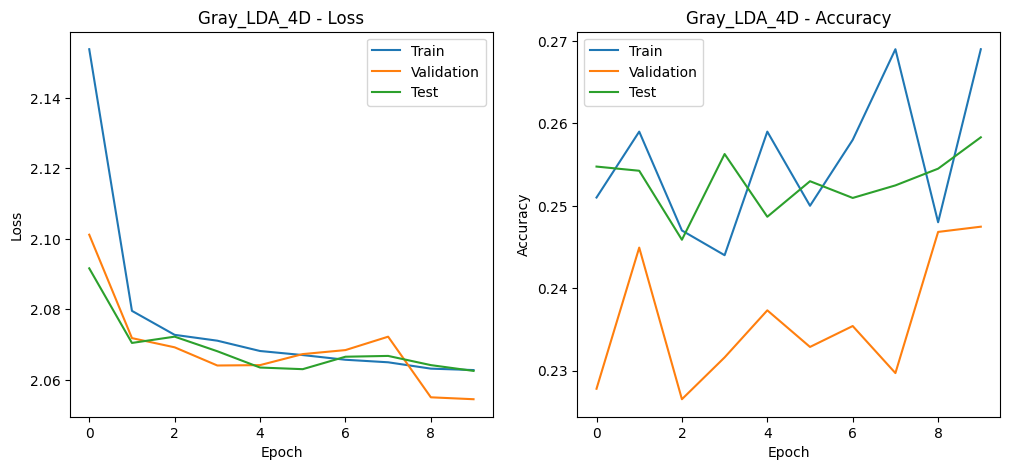

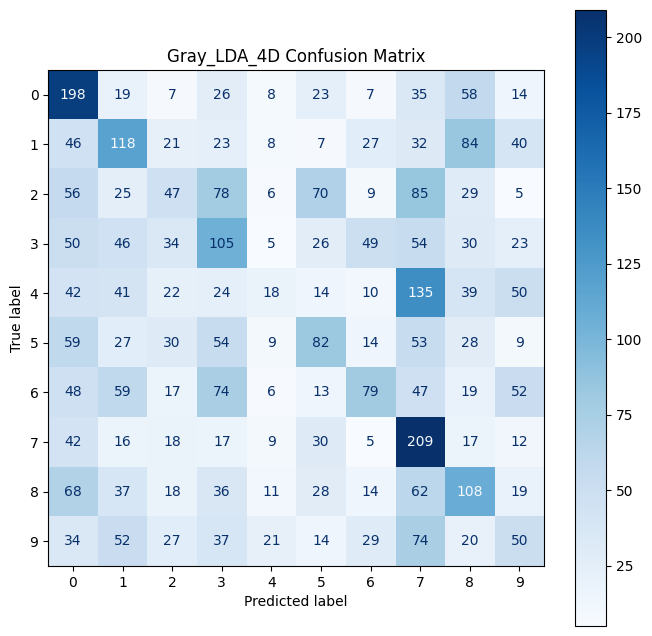

✅ Gray_LDA_4D training complete.

--- Preparing Gray_LDA_8D ---

==================== Training Gray_LDA_8D ====================
🔄 Found checkpoint for Gray_LDA_8D, loading...
   > Resuming from epoch 11

Running final evaluation for visualization...


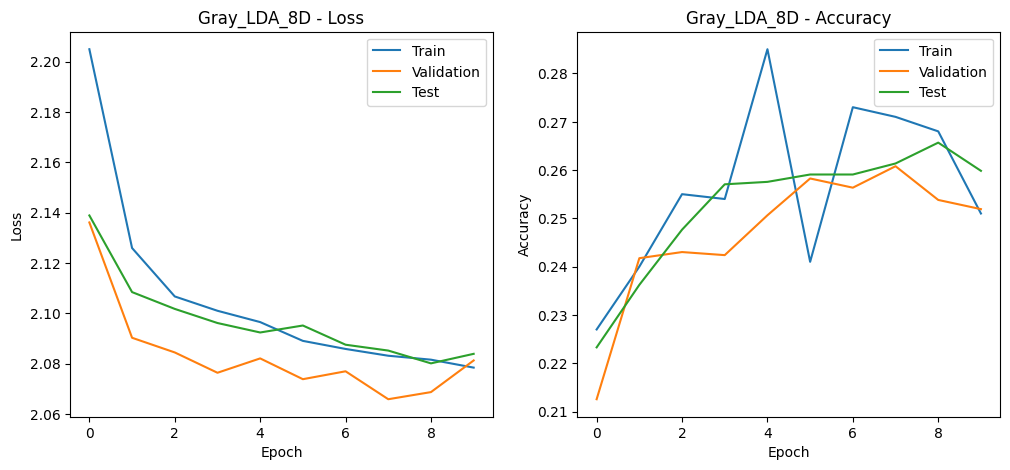

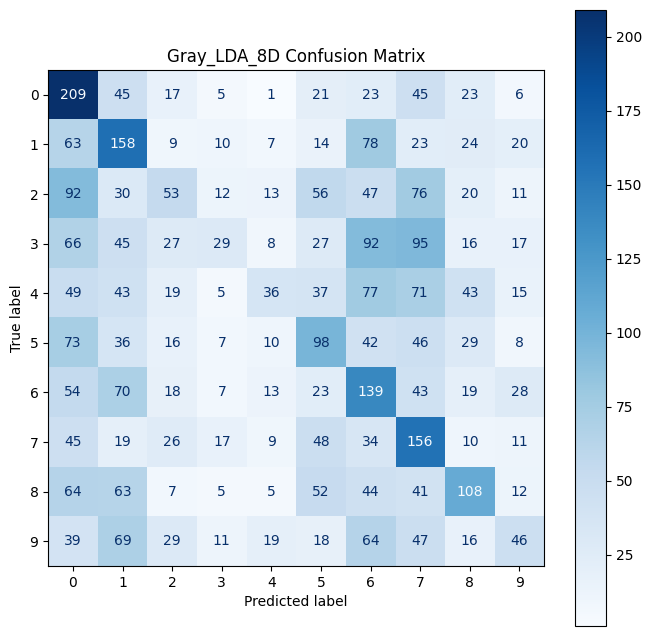

✅ Gray_LDA_8D training complete.

--- Preparing Binary_LDA_4D ---

==================== Training Binary_LDA_4D ====================
🔄 Found checkpoint for Binary_LDA_4D, loading...
   > Resuming from epoch 11

Running final evaluation for visualization...


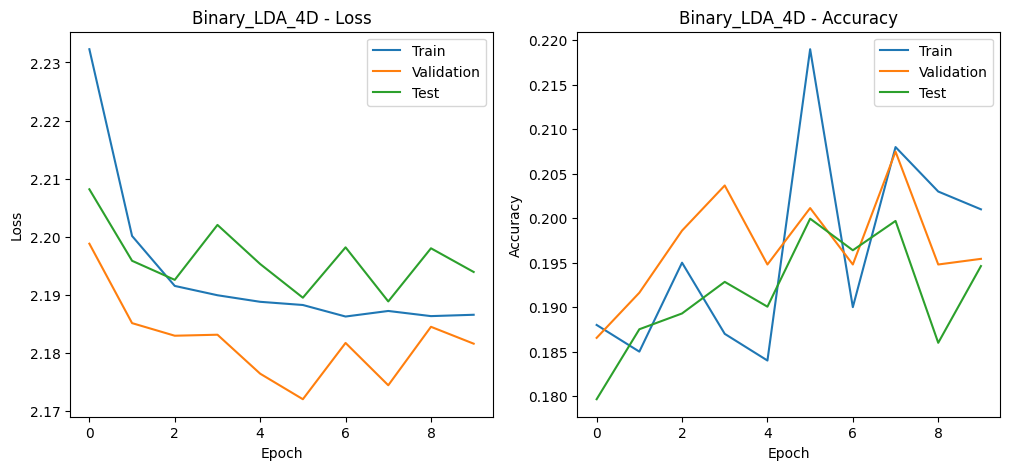

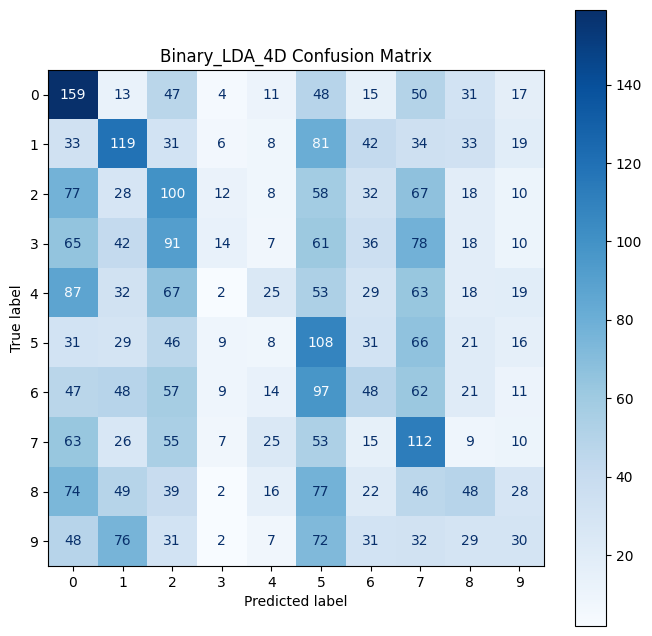

✅ Binary_LDA_4D training complete.

--- Preparing Binary_LDA_8D ---

==================== Training Binary_LDA_8D ====================
🔄 Found checkpoint for Binary_LDA_8D, loading...
   > Resuming from epoch 7


Epoch 7 | Train Loss: 2.2006 | Val Acc: 19.16% | Test Acc: 18.14%


Epoch 8 | Train Loss: 2.1986 | Val Acc: 19.23% | Test Acc: 17.51%


Epoch 9 | Train Loss: 2.1981 | Val Acc: 18.85% | Test Acc: 17.91%


Epoch 10 | Train Loss: 2.1972 | Val Acc: 18.40% | Test Acc: 17.38%

Running final evaluation for visualization...


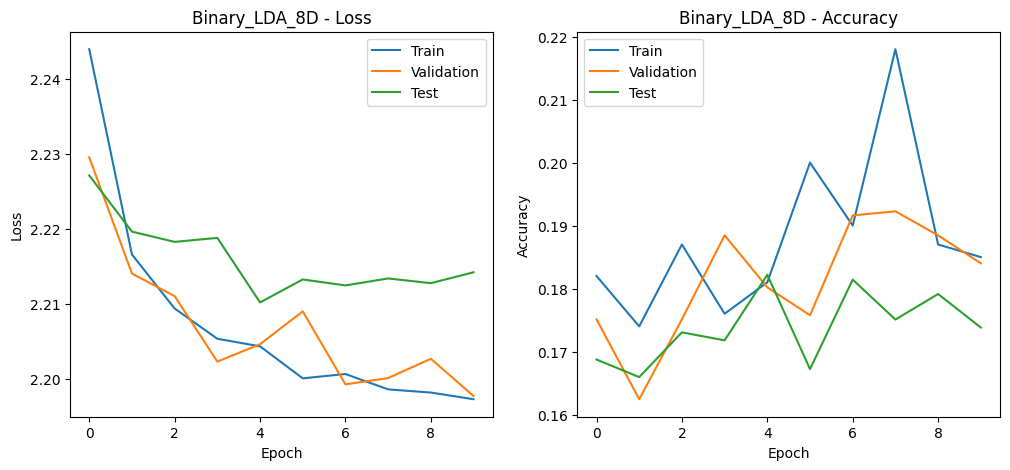

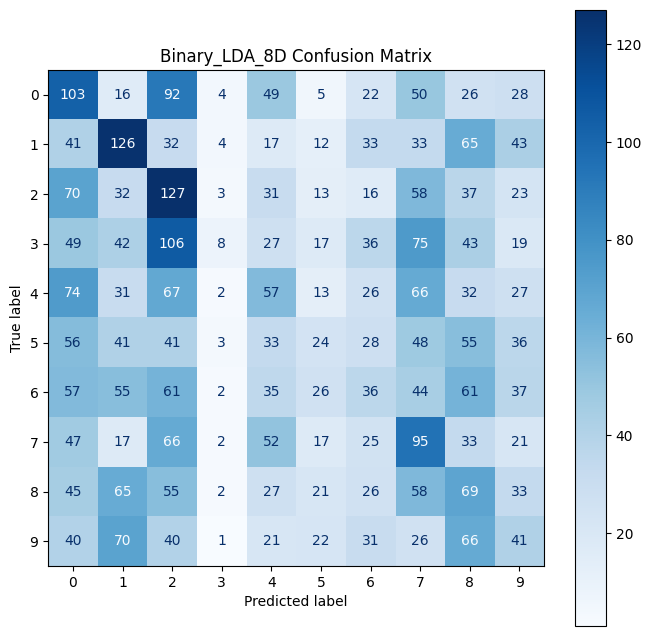

✅ Binary_LDA_8D training complete.


🎉 All LDA models trained and evaluated successfully!


In [7]:
# ==========================================
# 2. Execute Training for LDA Models
# ==========================================

# Define lists to iterate over
dims = [4, 8]
EPOCHS = 10
BATCH_SIZE = 32
LR = 0.01

print(f"🚀 Starting LDA Model Training (Epochs={EPOCHS}, Batch={BATCH_SIZE}, LR={LR})...\n")

# ---------------------------------------------------------
# A. Train Grayscale LDA Models (4D & 8D)
# ---------------------------------------------------------
for n in dims:
    model_name = f"Gray_LDA_{n}D"
    print(f"--- Preparing {model_name} ---")
    
    # Retrieve specific data and model from dictionaries
    model     = models_gray_lda[n]
    X_train   = X_train_gray_lda_t_dict[n]
    y_train   = y_train_gray_lda_t_dict[n]
    X_test    = X_test_gray_lda_t_dict[n]
    y_test_np = y_test_gray_lda_np_dict[n]

    # Run Training
    train_and_evaluate(
        model=model,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test_np=y_test_np,
        model_name=model_name,
        device=device,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        lr=LR
    )

# ---------------------------------------------------------
# B. Train Binary LDA Models (4D & 8D)
# ---------------------------------------------------------
for n in dims:
    model_name = f"Binary_LDA_{n}D"
    print(f"--- Preparing {model_name} ---")
    
    # Retrieve specific data and model from dictionaries
    model     = models_binary_lda[n]
    X_train   = X_train_binary_lda_t_dict[n]
    y_train   = y_train_binary_lda_t_dict[n]
    X_test    = X_test_binary_lda_t_dict[n]
    y_test_np = y_test_binary_lda_np_dict[n]

    # Run Training
    train_and_evaluate(
        model=model,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test_np=y_test_np,
        model_name=model_name,
        device=device,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        lr=LR
    )

print("\n🎉 All LDA models trained and evaluated successfully!")